### ÁREA BAJO LA CURVA ROC (Receiver Operating Characteristic - Característica Operativa del Receptor)

In [10]:
# Importamos librerías necesarias
import warnings
import pandas
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

In [2]:
# Cargamos el dataset Indian Diabetes directamente desde la web.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7

In [5]:
# Realizamos la partición, definimos y entrenamos el modelo de Regresión Logística
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [6]:
# Predicción de probabilidades
probs = model.predict_proba(X_test)


In [7]:
# Se mantienen las probabilidades sólo para el resultado positivo
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 85.02%


In [8]:
# Cálculo de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)


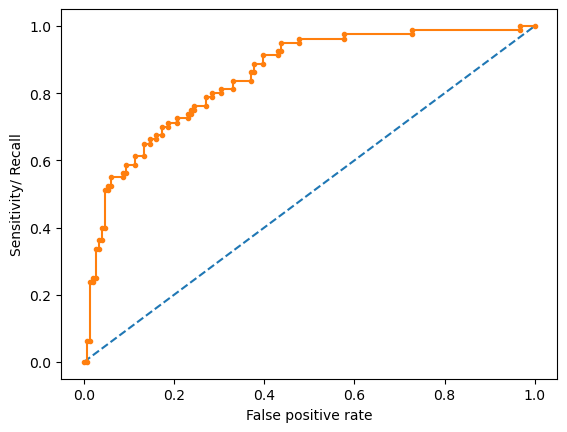

In [11]:
# graficamos la curva ROC del modelo
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')
plt.xlabel('Ratio Falsos positivos')
plt.ylabel('Sensibilidad/ Recall')

plt.show()